In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

from nltk.corpus import stopwords # to remove words like {The, for , of , in , with ,etc}..because they are of no use to us


from nltk.stem.porter import PorterStemmer # brings words to- base from{(loved, loving)=> love}
from sklearn.feature_extraction.text import TfidfVectorizer #convert words to vectors loved = [0.0]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import string

In [2]:
data_fake =pd.read_csv('Fake.csv')
data_true =pd.read_csv('True.csv')

C:\Users\HARSH\AppData\Local\Temp\ipykernel_13056\1553279927.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  data_fake =pd.read_csv('Fake.csv')


In [3]:
data_fake.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
data_fake["class"]=0
data_true["class"]=1

In [6]:
data_fake.shape , data_true.shape

((23502, 173), (21417, 5))

In [7]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    if i in data_fake.index:
        data_fake.drop([i], axis = 0, inplace = True)


In [8]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    if i in data_true.index:
        data_true.drop(i , axis = 0, inplace = True)


In [9]:
data_fake.shape , data_true.shape

((23492, 173), (21407, 5))

In [10]:
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1

C:\Users\HARSH\AppData\Local\Temp\ipykernel_13056\277247672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
C:\Users\HARSH\AppData\Local\Temp\ipykernel_13056\277247672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


In [11]:
data_fake_manual_testing.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,class
23492,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
23493,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
23494,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
23495,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
23496,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [12]:
data_merge =pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
data_merge.shape

(44899, 173)

In [14]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165', 'Unnamed: 166',
       'Unnamed: 167', 'Unnamed: 168', 'Unnamed: 169', 'Unnamed: 170',
       'Unnamed: 171', 'class'],
      dtype='object', length=173)

In [15]:
data = data_merge.drop(['title','subject','date'],axis='columns')

In [16]:
data.isnull().sum()

text                0
Unnamed: 4      44878
Unnamed: 5      44879
Unnamed: 6      44879
Unnamed: 7      44879
                ...  
Unnamed: 168    44897
Unnamed: 169    44897
Unnamed: 170    44897
Unnamed: 171    44897
class               0
Length: 170, dtype: int64

In [17]:
data = data.sample(frac =1) #random suffling

In [18]:
data.head()

,text,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,class
3298,(Reuters) - Former FBI Director James Comey sa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10723,A ridiculous Kathy Griffin breaks down over th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
14169,The big question is whether or not Cruz can ge...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10385,(Reuters) - Republican presidential candidate ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
16187,New Mexico led all states with 72 percent of t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [19]:
data.reset_index(inplace = True)
data.drop(['index'],axis=1 ,inplace =True)

In [20]:
data.columns

Index(['text', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       ...
       'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165', 'Unnamed: 166',
       'Unnamed: 167', 'Unnamed: 168', 'Unnamed: 169', 'Unnamed: 170',
       'Unnamed: 171', 'class'],
      dtype='object', length=170)

In [21]:
data.head()

,text,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,class
0,(Reuters) - Former FBI Director James Comey sa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,A ridiculous Kathy Griffin breaks down over th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,The big question is whether or not Cruz can ge...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,(Reuters) - Republican presidential candidate ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,New Mexico led all states with 72 percent of t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [22]:
#to process the text

In [23]:
def wordopt(text):
    text = text.lower()
    text=re.sub('\[.*?/]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('w*\d\w*','',text)
    return text

In [24]:
data['text'] = data['text'].apply(wordopt)

In [25]:
X=data['text']
y=data['class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25)

In [27]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

In [28]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [29]:
pred_lr = LR.predict(xv_test)

In [30]:
LR.score(xv_test,y_test)

0.9866369710467706

In [31]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5902
           1       0.99      0.98      0.99      5323

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [32]:
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [33]:
pred_dt = DT.predict(xv_test)

In [34]:
DT.score(xv_test,y_test)

0.995456570155902

In [35]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5902
           1       1.00      0.99      1.00      5323

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [36]:

# GB = GradientBoostingClassifier(n_estimators=50,subsample=0.8,random_state=0)
# GB.fit(xv_train,y_train)

In [37]:
# pred_gb = GB.predict(xv_test)

In [38]:
# GB.score(xv_test,y_test)

In [39]:
# print(classification_report(y_test,pred_gb))

In [40]:
RF = RandomForestClassifier()
RF.fit(xv_train,y_train)

RandomForestClassifier()

In [41]:
pred_rf = RF.predict(xv_test)

In [42]:
RF.score(xv_test,y_test)

0.9896659242761693

In [43]:
# def output_label(n):
#     if(n==0):
#         return "fake News"
#     elif(n==1):
#         return "Not a Fake News"
    

    
    
# def manual_testing(news):
#     testing_news = {"text":[news]}
#     new_def_test = pd.DataFrame(testing_news)
#     new_def_test ["text"] = new_def_test["text"].apply(wordopt)
#     new_x_test= new_def_test["text"]
#     new_xv_test = vectorization.transform(new_x_test)
#     pred_LR = LR.predict(new_xv_test)
#     pred_DT = DT.predict(new_xv_test)
# #     pred_GBC = GB.predict(new_xv_test)
#     pred_RFC= RF.predict(new_xv_test)
    
#     return print("\n \n LR Prediction {} \n DT Prediction {} \n RFC Prediction {}  ".format(output_label(pred_LR[0]),output_label(pred_DT[0]),output_label(pred_RFC[0])))
    

In [44]:
# def output_label(n):
#     if n == 0:
#         return "Fake News"
#     elif n == 1:
#         return "Not Fake News"

# def manual_testing(news):
#     # Create a DataFrame for the new news article
#     testing_news = {"text": [news]}
#     new_def_test = pd.DataFrame(testing_news)
    
#     # Apply preprocessing
#     new_def_test["text"] = new_def_test["text"].apply(wordopt)
#     new_x_test = new_def_test["text"]
    
#     # Vectorize the text
#     new_xv_test = vectorization.transform(new_x_test)
    
#     # Predict using different models
#     pred_LR = LR.predict(new_xv_test)
#     pred_DT = DT.predict(new_xv_test)
#     pred_RFC = RF.predict(new_xv_test)
    
#     # Count predictions for "Fake News"
#     predictions = [pred_LR[0], pred_DT[0], pred_RFC[0]]
#     fake_news_count = predictions.count(0)  # Count how many times "fake news" is predicted
    
#     # Determine final classification
#     if fake_news_count > 1:
#         final_classification = "Fake News"
#     else:
#         final_classification = "Not Fake News"
    
#     # Print predictions and final classification
#     print("\n\nLR Prediction: {}\nDT Prediction: {}\nRFC Prediction: {}\n \n \nFinal Conclusion: {}".format(
#         output_label(pred_LR[0]),
#         output_label(pred_DT[0]),
#         output_label(pred_RFC[0]),
#         final_classification
#     ))



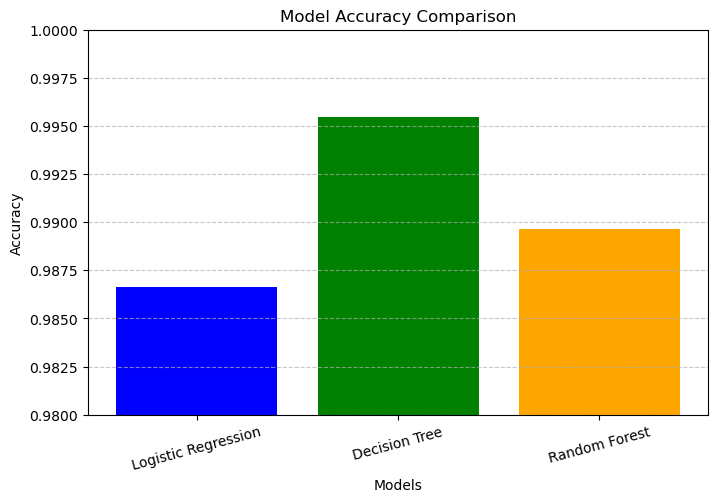

In [45]:

import matplotlib.pyplot as plt


accuracies = [LR.score(xv_test,y_test), DT.score(xv_test,y_test), RF.score(xv_test,y_test)]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']


plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0.98, 1.0) 
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


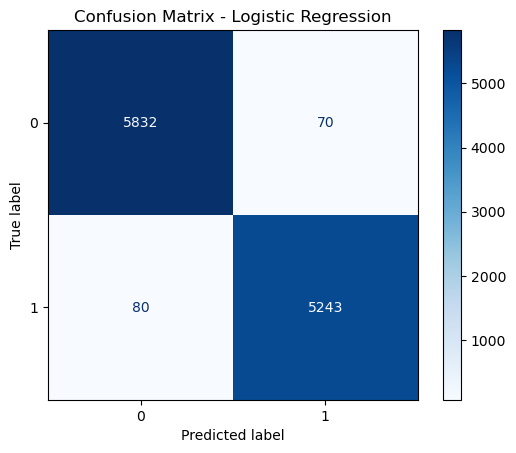

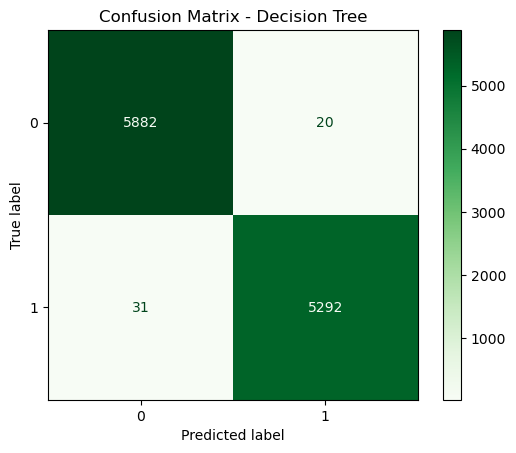

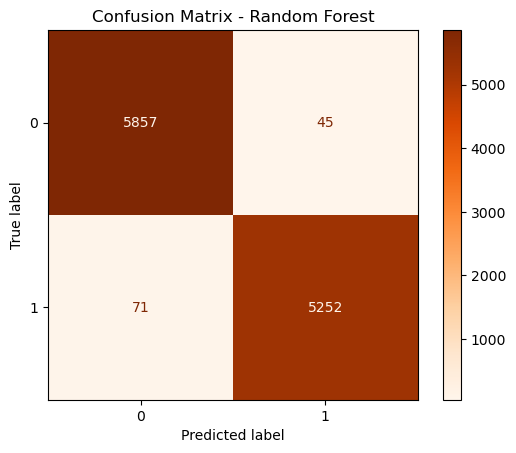

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay.from_estimator(LR, xv_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Decision Tree Confusion Matrix
ConfusionMatrixDisplay.from_estimator(DT, xv_test, y_test, cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(RF, xv_test, y_test, cmap='Oranges')
plt.title("Confusion Matrix - Random Forest")
plt.show()


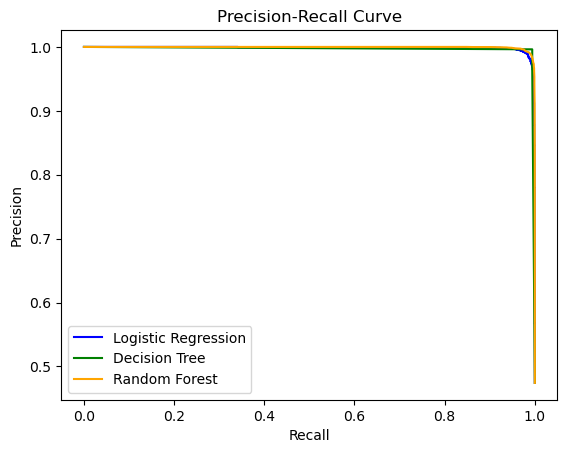

In [47]:
from sklearn.metrics import precision_recall_curve

# Logistic Regression
probs_lr = LR.predict_proba(xv_test)[:, 1]
precision_lr, recall_lr, _ = precision_recall_curve(y_test, probs_lr)

# Decision Tree
probs_dt = DT.predict_proba(xv_test)[:, 1]
precision_dt, recall_dt, _ = precision_recall_curve(y_test, probs_dt)

# Random Forest
probs_rf = RF.predict_proba(xv_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, probs_rf)

# Plotting
plt.plot(recall_lr, precision_lr, label='Logistic Regression', color='blue')
plt.plot(recall_dt, precision_dt, label='Decision Tree', color='green')
plt.plot(recall_rf, precision_rf, label='Random Forest', color='orange')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


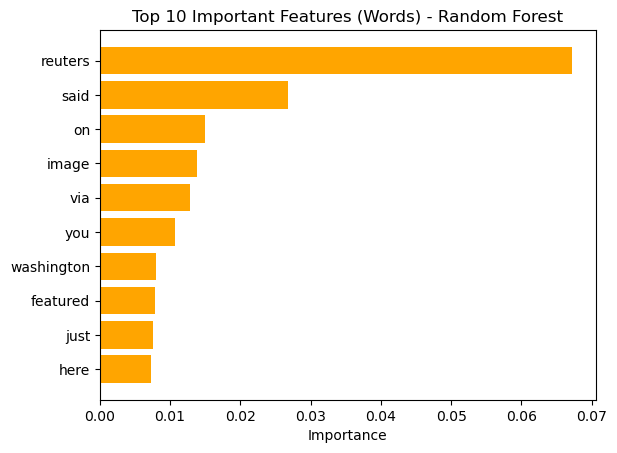

In [48]:
# Feature importance from Random Forest
feature_importances = RF.feature_importances_
features = vectorization.get_feature_names_out()

# Sort and select top 10 features
important_features = sorted(zip(feature_importances, features), reverse=True)[:10]
importance, words = zip(*important_features)

# Plot
plt.barh(words, importance, color='orange')
plt.xlabel('Importance')
plt.title('Top 10 Important Features (Words) - Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [49]:
from tabulate import tabulate  # Import tabulate for table formatting

def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not Fake News"

def manual_testing(news):
    # Create a DataFrame for the new news article
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    
    # Apply preprocessing
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    
    # Vectorize the text
    new_xv_test = vectorization.transform(new_x_test)
    
    # Predict using different models
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RFC = RF.predict(new_xv_test)
    
    # Prepare results for the table
    results = [
        ["Logistic Regression", output_label(pred_LR[0])],
        ["Decision Tree", output_label(pred_DT[0])],
        ["Random Forest", output_label(pred_RFC[0])],
    ]
    
    # Display results in a table
    print("\nModel Predictions:")
    print(tabulate(results, headers=["Model", "Prediction"], tablefmt="grid"))
    
    # Determine the final conclusion based on majority voting
    predictions = [pred_LR[0], pred_DT[0], pred_RFC[0]]
    fake_news_count = predictions.count(0)  # Count how many times "Fake News" is predicted
    
    if fake_news_count > 1:
        final_classification = "Fake News"
    else:
        final_classification = "Not Fake News"
    
    # Display the final conclusion
    print("\nFinal Conclusion based on majority: {}".format(final_classification))



In [51]:
# Test the updated function
news = str(input("Enter the news text: "))
manual_testing(news)

Enter the news text: Here’s how the Sunday panned out for Kinzang Lhamo at the Paris Olympics.  Kinzang Lhamo of Bhutan in action during the marathon at Paris Olympics. (REUTERS) Kinzang Lhamo of Bhutan in action during the marathon at Paris Olympics. (REUTERS) Egged on by hundreds of spectators walking and running along the streets of Paris on a sunny morning, she completed the marathon last among the finishers, 90 minutes after the winner. Cheered on by thousands of spectators seated inside the Stade de France on a windy evening, she fervently waved the Bhutan flag as her country’s flag-bearer at the closing ceremony.s

Model Predictions:
+---------------------+---------------+
| Model               | Prediction    |
+=====================+===============+
| Logistic Regression | Not Fake News |
+---------------------+---------------+
| Decision Tree       | Not Fake News |
+---------------------+---------------+
| Random Forest       | Fake News     |
+---------------------+--------

In [ ]:
# "New Study Shows Chocolate Helps You Lose Weight While You Sleep"
# Body: According to a study released by the fictional Chocolate Science Institute, eating a bar of chocolate before bed can help you shed pounds overnight. Researchers claim that the flavonoids in chocolate stimulate metabolism in such a way that fat burns while you sleep. Critics, however, have pointed out that the study was funded by a major chocolate manufacturer.

# fake news

In [ ]:
# "Scientists Discover That Talking to Plants Makes Them Grow Faster—But Only in Moonlight"
# # Body: Researchers at the fictional Lunar Botanical Institute have released findings that suggest plants grow significantly faster when spoken to during moonlight hours. The study claims that plants respond to specific types of verbal communication, but only when exposed to moonlight. Critics argue that the study lacks rigorous controls and question the validity of the findings, especially given the source’s dubious reputation.

In [ ]:
New Research Reveals That Eating Only Blue Foods Can Make You Live Forever"
# Body: A recent study from the fictional Blue Food Research Institute claims that consuming only foods of blue color can extend human lifespan indefinitely. The research, which involved a small group of volunteers eating only blueberries, blue potatoes, and other blue-hued foods, allegedly showed remarkable health benefits. However, many experts are skeptical, pointing out that the study was conducted by a company that sells blue food products and has not been peer-reviewed.

In [ ]:
# Headline: "Government Announces Plan to Tax Internet Memes"
# Body: In a controversial move, the government has unveiled a proposal to tax internet memes, claiming that the proliferation of memes is harming productivity and wasting bandwidth. The so-called "Meme Tax" has sparked outrage across social media platforms, with users rallying to defend their right to share funny pictures of cats without paying a fee.

# 3. Headline: "Alien Spaceship Spotted Over New York, Declares 'We Come in Peace'"
# Body: Residents of New York City were shocked when a massive alien spaceship appeared in the sky, hovering over Central Park. The extraterrestrial visitors displayed a message in multiple languages, stating, "We come in peace." While authorities have yet to confirm the authenticity of the sighting, social media is abuzz with videos and photos of the event.

# 4. Headline: "Scientists Discover Cure for Aging, Expected to Be Available by 2030"
# Body: A team of scientists claims to have found a cure for aging, potentially allowing humans to live indefinitely. The breakthrough involves a combination of gene therapy and nanotechnology that reverses the aging process at the cellular level. Although the treatment is still in the experimental phase, it could be available to the public within the next decade.

# 5. Headline: "Tech Giant Develops Mind-Reading Smartphone, Sparks Privacy Concerns"
# Body: A leading tech company has reportedly developed a smartphone capable of reading users' thoughts. The device uses advanced neural interfaces to detect and interpret brainwaves, allowing users to control the phone with their minds. Privacy advocates are alarmed by the potential for misuse, warning that the technology could lead to unprecedented levels of surveillance.

# true news

In [ ]:
# Today (on August 12), the Supreme Court issued notice to the Directorate of Enforcement (ED) on the bail plea of Aam Aadmi Party communications-in-charge Vijay Nair in a money laundering case pertaining to the national capital's excise policy.  The Bench of justices Hrishikesh Roy and SVN Bhatti was hearing a SLP preferred by Nair challenging the Delhi High Court order that denied him bail.  Also Read - Supreme Court Reserves Verdict On Bail Plea Of Senthil Balaji In Money Laundering Case, Flags Delay In Trial  During the course of today's proceedings, Senior Advocate Vikram Chaudhary, appearing for Nair, cited the recent case wherein the bail plea of former Delhi Deputy Chief Minister and Aam Aadmi Party leader Manish Sisodia was allowed. The Top Court had taken into consideration the prolonged incarceration of 17 months and the delay in trial.  Chaudhary said that Nair had gone about a year and 10 months of custody. He said that Sisodia, also a co-accused, was seeking bail in the cases registered by ED as well as CBI. However, Nair was granted bail by the Trial Court in the CBI case and is seeking bail only with respect to the PMLA case registered by the ED. “I am on a much higher footing,” he said.  Also Read - Supreme Court To Consider Correctness Of Kerala HC View That Mere Storage Of Child Pornography Is No Offence Under POCSO/IT Acts Senior Advocate Abhishek Manu Singhvi, for Nair, submitted that the trial has not commenced and one prosecution and eight supplementary complaints have been filed. It was also pointed out that 40 persons have been arranged as accused with nine complaints and case records are running into 50,000 pages. Additionally, 320 witnesses are expected to be examined  In this regard, the Court noted that “it is quite likely, going by the trend of things, that more supplementary complaints might be forthcoming.”  Also Read - Supreme Court Shocked By UP Prison Secretary Citing Model Code Of Conduct As Excuse For Not Deciding Prisoner's Remission Nair, along with co-accused persons Sameer Mahendru, Sharath Reddy, Abhishek Boinpally and Benoy Babu, were denied bail by a special judge of Rouse Avenue Courts on February 16. The trial court had noted that further investigation was still pending and it was not possible to hold that they would make no attempt to tamper with the evidence if released.  It was also observed that oral and documentary evidence suggested that Nair was also in frequent touch with various stakeholders of liquor business through different modes of communication. Their use of the said modes and App was only in pursuance of their attempt not to leave any trail of their misdeeds.  Also Read - Supreme Court Seeks Explanation From Chief Judicial Magistrate For Prima Facie Violation Of Its Order The High Court said that it did not find any illegality or perversity in the Trial Court's order and refused to interfere with the Trial Court's order.

In [ ]:
# The question of who will be the next BJP president and the timing of the election to that post is still hanging fire. File | Photo Credit: PTI  The question of who will be the next BJP president and the timing of the election to that post is still hanging fire, with both the BJP and the RSS getting into a huddle before the formal “samanvay” (coordination) meeting of Sangh Parivar affiliates to be held in Palakkad at the end of this month.  On Sunday evening, a marathon meeting lasting up to five hours was held at Defence Minister Rajnath Singh’s residence. RSS second-in-command Dattatreya Hosabele and its joint general secretary Arun Kumar were present at the meeting, along with Mr. Singh, Home Minister Amit Shah and Health Minister and BJP president J.P. Nadda.   BJP and RSS re-kindle closer coordination for upcoming Assembly elections  According to top sources, the meeting took up the question of the next BJP president as well as the situation with regard to the safety of minority Hindus in Bangladesh.  “There are two schools of thought with regard to the next BJP president – one, that a working president, who will ultimately be the only candidate, be named early; another school is batting for the Maharashtra, Haryana and Jharkhand polls to be over for any new working president to be announced,” said the source. There was no clarity on who prevailed during this meeting.  The RSS has been clear that the next BJP president is to be elected in active consultation with the RSS, unlike in the past, while the BJP is playing for time. “The results of the Lok Sabha polls have convinced the RSS that someone who will be strong enough to handle the organisation needs to be in place, while the BJP high command wants the seamless coordination between it and the president’s office as before,” added the source.
# # 

In [ ]:
# Here’s how the Sunday panned out for Kinzang Lhamo at the Paris Olympics.  Kinzang Lhamo of Bhutan in action during the marathon at Paris Olympics. (REUTERS) Kinzang Lhamo of Bhutan in action during the marathon at Paris Olympics. (REUTERS) Egged on by hundreds of spectators walking and running along the streets of Paris on a sunny morning, she completed the marathon last among the finishers, 90 minutes after the winner. Cheered on by thousands of spectators seated inside the Stade de France on a windy evening, she fervently waved the Bhutan flag as her country’s flag-bearer at the closing ceremony.

In [ ]:
# One Israeli male hostage was killed by his guard and two women captives were seriously wounded in two separate incidents in Gaza, the spokesperson for Hamas' armed al-Qassam Brigades, Abu Ubaida, said on Monday.